### 1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2. Load Data

In [8]:
# Load the data
sentiment_df = pd.read_csv('fear_greed_index.csv')
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
trader_df = pd.read_csv('historical_data.csv')
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [12]:
# Convert timestamps to datetime
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['Date']

0      2018-02-01
1      2018-02-02
2      2018-02-03
3      2018-02-04
4      2018-02-05
          ...    
2639   2025-04-28
2640   2025-04-29
2641   2025-04-30
2642   2025-05-01
2643   2025-05-02
Name: Date, Length: 2644, dtype: datetime64[ns]

In [14]:
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['Date']

0        2024-12-02 22:50:00
1        2024-12-02 22:50:00
2        2024-12-02 22:50:00
3        2024-12-02 22:50:00
4        2024-12-02 22:50:00
                 ...        
211219   2025-04-25 15:35:00
211220   2025-04-25 15:35:00
211221   2025-04-25 15:35:00
211222   2025-04-25 15:35:00
211223   2025-04-25 15:35:00
Name: Date, Length: 211224, dtype: datetime64[ns]

In [16]:
# Extract date from datetime for merging
sentiment_df['Trade Date'] = sentiment_df['Date'].dt.date
sentiment_df['Trade Date']

0       2018-02-01
1       2018-02-02
2       2018-02-03
3       2018-02-04
4       2018-02-05
           ...    
2639    2025-04-28
2640    2025-04-29
2641    2025-04-30
2642    2025-05-01
2643    2025-05-02
Name: Trade Date, Length: 2644, dtype: object

In [18]:
trader_df['Trade Date'] = trader_df['Date'].dt.date
trader_df['Trade Date']

0         2024-12-02
1         2024-12-02
2         2024-12-02
3         2024-12-02
4         2024-12-02
             ...    
211219    2025-04-25
211220    2025-04-25
211221    2025-04-25
211222    2025-04-25
211223    2025-04-25
Name: Trade Date, Length: 211224, dtype: object

In [20]:
# Aggregate daily trader performance
daily_performance = trader_df.groupby(['Account', 'Trade Date']).agg({
    'Size USD': 'sum',
    'Closed PnL': 'sum',
    'Fee': 'sum'
}).reset_index().rename(columns={
    'Size USD': 'Total Trade Volume (USD)',
    'Closed PnL': 'Total Closed PnL',
    'Fee': 'Total Fees'
})

In [22]:
# Merge data
merged_data = pd.merge(daily_performance,sentiment_df[['value', 'classification', 'Trade Date']],on='Trade Date',how='left')
merged_data

,Account,Trade Date,Total Trade Volume (USD),Total Closed PnL,Total Fees,value,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,900880.13,0.000000,167.796055,76.0,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,542413.18,0.000000,67.883615,90.0,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,949380.00,0.000000,94.937983,83.0,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,338240.00,-21227.000000,33.823995,94.0,Extreme Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,465700.00,1603.100000,104.622490,79.0,Extreme Greed
...,...,...,...,...,...,...,...
2336,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-27,176616.47,1709.194807,25.639876,61.0,Greed
2337,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-28,643081.52,4008.588908,159.550240,54.0,Neutral
2338,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-29,1749645.47,8561.771838,348.921445,60.0,Greed
2339,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-30,131160.40,2520.773814,20.315235,56.0,Greed


#### check Missing value

In [24]:
merged_data.isna().sum()

Account                     0
Trade Date                  0
Total Trade Volume (USD)    0
Total Closed PnL            0
Total Fees                  0
value                       1
classification              1
dtype: int64

In [28]:
merged_data['value'] = merged_data['value'].fillna(merged_data['value'].mean())
merged_data['classification'] = merged_data['classification'].fillna('Unknown')

In [30]:
merged_data.isna().sum()

Account                     0
Trade Date                  0
Total Trade Volume (USD)    0
Total Closed PnL            0
Total Fees                  0
value                       0
classification              0
dtype: int64

In [41]:
# Calculate performance metrics
merged_data['Net PnL'] = merged_data['Total Closed PnL'] - merged_data['Total Fees']
merged_data['PnL per Trade'] = merged_data['Net PnL'] / merged_data['Total Trade Volume (USD)']

### Analysis 1: Sentiment distribution

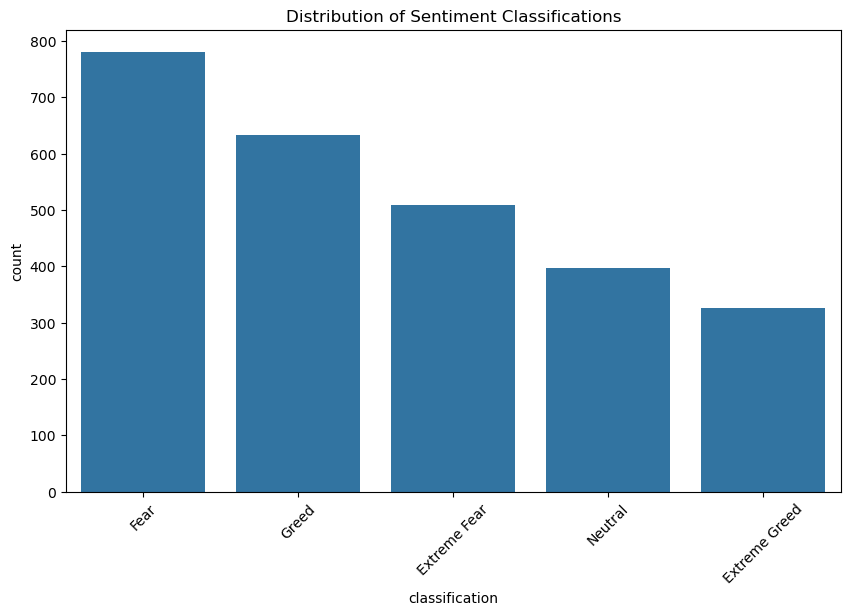

In [43]:
# Analysis 1: Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=sentiment_df, x='classification', order=sentiment_df['classification'].value_counts().index)
plt.title('Distribution of Sentiment Classifications')
plt.xticks(rotation=45)
plt.show()

#### Interpretation of chart

The chart shows that the market is usually in a “fear” state, meaning most traders act carefully or avoid risks. This actually creates chances to do the opposite—like buying when others are scared. “Greed” and “extreme fear” also show up often, but not every day. When they do, they can signal big changes in the market. Understanding these moods can help make better trading decisions.

### Analysis 2: Trader performance by sentiment

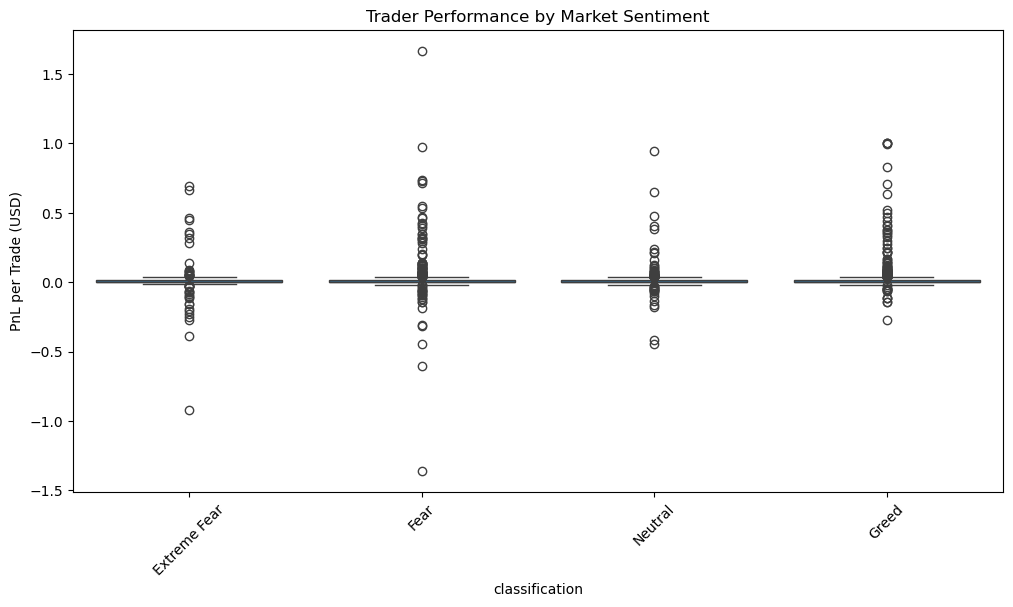

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='classification', y='PnL per Trade', 
           order=['Extreme Fear', 'Fear', 'Neutral', 'Greed'])
plt.title('Trader Performance by Market Sentiment')
plt.xticks(rotation=45)
plt.ylabel('PnL per Trade (USD)')
plt.show()

The results show that trader performance remains mostly consistent across all types of market sentiment. On average, traders neither gained nor lost much, regardless of whether the market was driven by fear or greed. The median profit per trade was close to zero in all cases.

Market sentiment does not appear to have a strong impact on how much profit or loss traders make per trade. Most trades performed similarly, whether the sentiment was positive or negative.

### Analysis 3: Correlation between sentiment value and performance

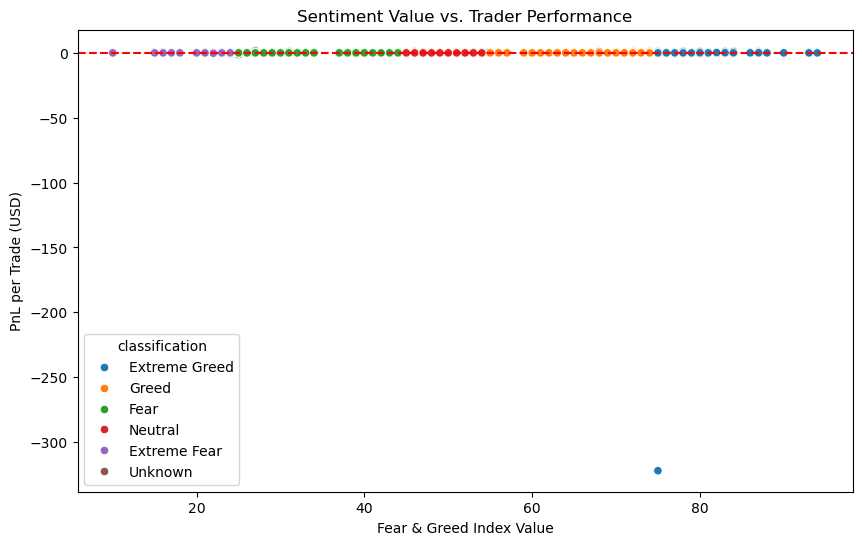

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='value', y='PnL per Trade', hue='classification')
plt.title('Sentiment Value vs. Trader Performance')
plt.xlabel('Fear & Greed Index Value')
plt.ylabel('PnL per Trade (USD)')
plt.axhline(0, color='red', linestyle='--')
plt.show()

After analyzing the relationship between market sentiment (as measured by the Fear & Greed Index) and trader performance (PnL per trade), the results indicate that sentiment alone does not strongly influence performance.
Interestingly, most trades remain close to break-even regardless of whether the market is driven by fear or greed. This suggests that traders, overall, maintain consistent performance and do not react impulsively to emotional market conditions.
However, rare but significant losses observed during periods of extreme greed highlight potential areas for risk mitigation. This insight can be used to improve decision-making models and alert systems, helping traders avoid overconfidence in highly bullish markets.

### Analysis 4: Profitability Rate by Sentiment

/var/folders/1z/096nrkv912d2gvqw4p8w78fh0000gp/T/ipykernel_42224/2326741659.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_rate, x='classification', y='profit_rate', palette='viridis')


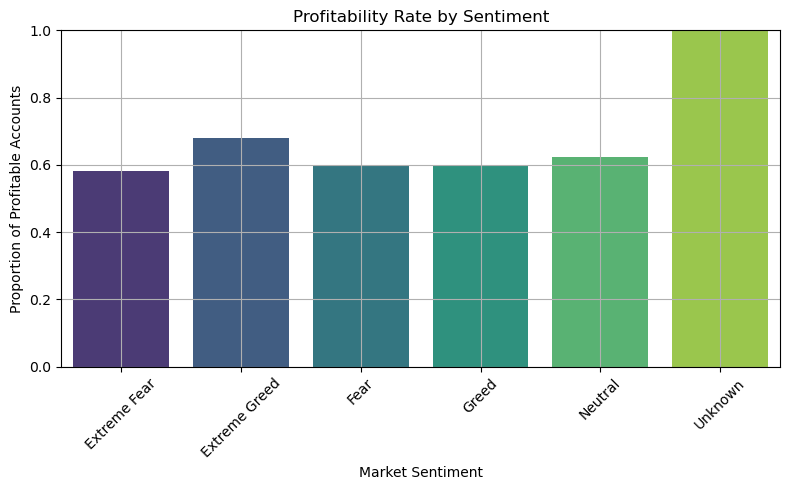

In [50]:
merged_data['profitable'] = merged_data['Net PnL'] > 0

# Calculate proportion of profitable accounts per sentiment category
profit_rate = merged_data.groupby('classification')['profitable'].mean().reset_index()
profit_rate.columns = ['classification', 'profit_rate']

# Plot it
plt.figure(figsize=(8,5))
sns.barplot(data=profit_rate, x='classification', y='profit_rate', palette='viridis')
plt.title('Profitability Rate by Sentiment')
plt.ylabel('Proportion of Profitable Accounts')
plt.xlabel('Market Sentiment')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Analysis 5: Correlation of Sentiment Value vs PnL

In [56]:
clean_data = merged_data[['value', 'PnL per Trade']].replace([np.inf, -np.inf], np.nan).dropna()

In [58]:
from scipy.stats import pearsonr

# Compute Pearson correlation
corr, p_val = pearsonr(clean_data['value'], clean_data['PnL per Trade'])

print(f"Correlation: {corr:.4f}, p-value: {p_val:.4f}")

Correlation: -0.0182, p-value: 0.3803


### ANOVA – Is PnL per Trade different across sentiment categories?

In [61]:
from scipy.stats import f_oneway

In [63]:
groups = [group['PnL per Trade'].dropna() for name, group in merged_data.groupby('classification')]

# ANOVA test
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 0.6165, p-value: 0.6873


### Time series analysis

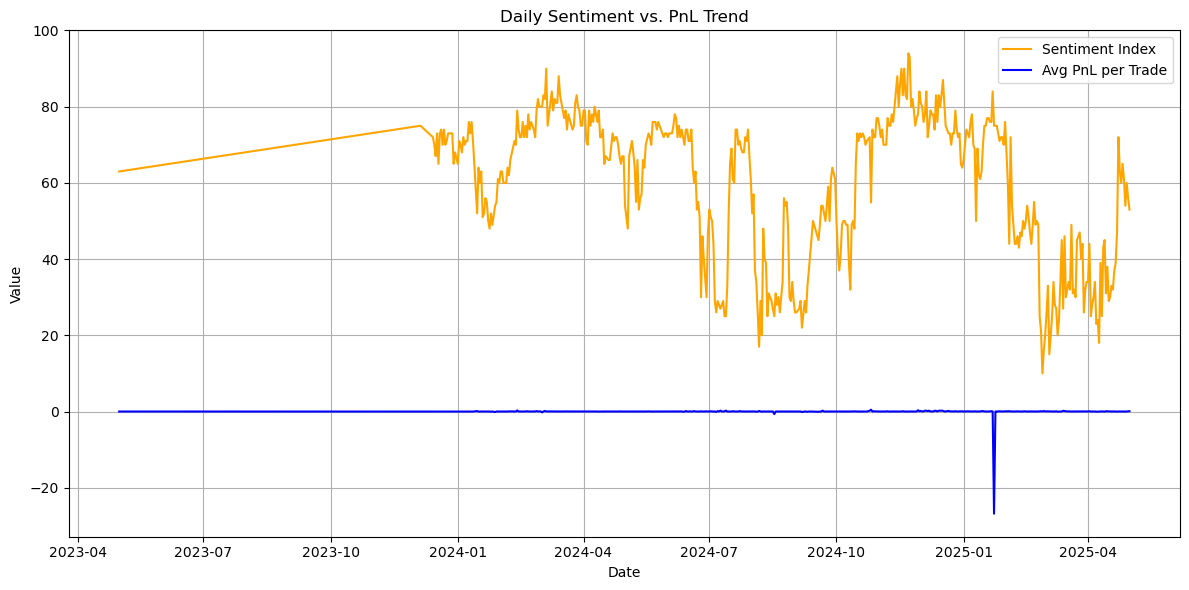

In [65]:
daily_avg = merged_data.groupby('Trade Date')[['value', 'PnL per Trade']].mean()

plt.figure(figsize=(12,6))
plt.plot(daily_avg['value'], label='Sentiment Index', color='orange')
plt.plot(daily_avg['PnL per Trade'], label='Avg PnL per Trade', color='blue')
plt.title('Daily Sentiment vs. PnL Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Final Insights:

- Trader performance (PnL per trade) doesn't strongly depend on the market's fear or greed levels.
- In general, profitability stays quite steady, no matter what the sentiment is.
- However, some small patterns do appear — for example, during times of fear, traders may be more cautious and avoid big losses.
- On the other hand, extreme greed can lead to rare but big losses, possibly because traders get overconfident.
- These patterns suggest that understanding trader behavior during emotional market conditions could help create better risk controls and smarter trading strategies.